# APS 5 - Questões com auxílio do Pandas

** Nome: ** <font color=blue> Ester dos Santos Quintino </font>


APS **INDIVIDUAL**

Data de Entrega: 26/Set até às 23h59 via GitHub.

Vamos trabalhar com dados do USGS (United States Geological Survey) para tentar determinar se os abalos detectados no hemisfério Norte têm grande probabilidade de serem testes nucleares.

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from scipy.stats import expon
import scipy.stats as stats

In [3]:
#Abrir o arquivo
df = pd.read_csv('earthquake.csv')
#listar colunas
print(list(df))

['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


## Liste as primeiras linhas do DataFrame

In [4]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


## Q1 - Manipulando o DataFrame

Crie uma coluna chamada `Hemisfério` baseada na Latitude

A regra de formação é a seguinte:

Valor | Critério
---|---
Norte | Latitude positiva
Sul | Latitude negativa

In [5]:
condition = df['Latitude']>0
df.loc[condition,'Hemisfério'] = 'Norte'
df.loc[-condition, 'Hemisfério'] = 'Sul'
#df.loc[condition, 'Critério'] = 'Latitude positiva'
#df.loc[-condition, 'Critério'] = 'Latitude negativa'
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Hemisfério
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte


## Q2 - Fit e Histograma

Faça o Histograma da Magnitude. Interprete.

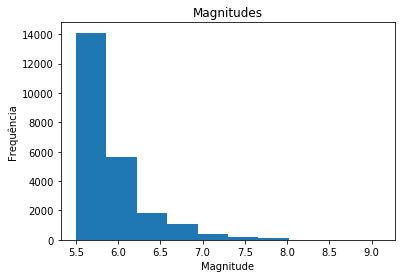

In [6]:
plt.hist(df.Magnitude)
plt.ylabel("Frequência")
plt.xlabel("Magnitude")
plt.title("Magnitudes")

Faça o fit de uma distribuição exponencial sobre os dados da Magnitude, achando os valores de **loc** e **scale**. Interprete loc e scale no caso da exponencial.
Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

In [7]:
mu,sigma = stats.expon.fit(df['Magnitude'])
print(mu,sigma)


5.49999999967 0.382548648851


Refaça o Histograma plotando a fdp (função densidade de probabilidade) da exponencial com os parâmetros achados no fit em cima. Cuidado com o domínio utilizado. Interprete.

(array([  1.67376179e+00,   6.71189513e-01,   2.14752169e-01,
          1.30512368e-01,   4.66285096e-02,   2.53905879e-02,
          1.23393511e-02,   2.25430454e-03,   5.93238036e-04,
          3.55942821e-04]),
 array([ 5.5 ,  5.86,  6.22,  6.58,  6.94,  7.3 ,  7.66,  8.02,  8.38,
         8.74,  9.1 ]),
 <a list of 10 Patch objects>)

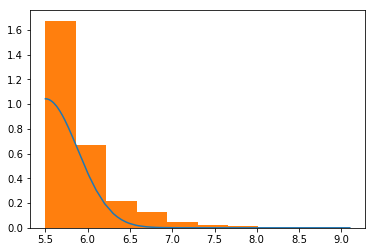

In [8]:
plt.plot(sorted(df["Magnitude"]),stats.norm.pdf(sorted(df['Magnitude']),loc=mu,scale = sigma))
plt.hist(df.Magnitude,normed=True)

## Q3 - Tabela cruzada

Faça uma tabela de cruzamento das variáveis `Hemisfério` e `Type`

Sua tabela deve ser <font color=red> normalizada</font>

In [9]:
tabela_h = pd.crosstab(df.Hemisfério, df.Type, normalize=True)
tabela_h

Type,Earthquake,Explosion,Nuclear Explosion,Rock Burst
Hemisfério,,,,
Norte,0.447121,0.000085,0.006279,0.000000
Sul,0.545191,0.000085,0.001196,0.000043


### Q3.1 - Qual a probabilidade de ocorrer um terremoto no hemisfério norte?

Adicione na célula abaixo o cálculo:

In [10]:
norte_terremoto=len(df.loc[(df.Hemisfério=="Norte")&(df.Type=="Earthquake")])
ter=len(df.Hemisfério)
prob=(norte_terremoto)/ter

prob


0.4471211344609602

Explique o seu raciocínio

A probabilidade de ocorrer um terremoto no hemisfério norte é a quantidade de terremotos que ocorreram no norte(no caso acima
em porcentagem), dividido pela quantidade de terremotos.

### Q3.2 - Dado que aconteceu no Norte, qual a probabilidade de ele ter sido `Nuclear Explosion`? 

Calcule a resposta abaixo, ou explique como a encontrou

Se for cálculo preencha a célula a seguir:

In [11]:
norte_ne=len(df.loc[(df.Hemisfério=='Norte')&(df.Type=='Nuclear Explosion')])
ne=len(df.Hemisfério)
prob_n=(norte_ne)/ne

prob_n*100

0.627883136852896

Se conseguir obter a resposta sem calcular, insira a resposta abaixo:

* A probabilidade de ter sido `Nuclear Explosion` é ...

## Q4 - Análise bivariada

Faça o *plot* de dispersão (*scatter plot*) entre as variáveis `Magnitude Error`  e `Depth`

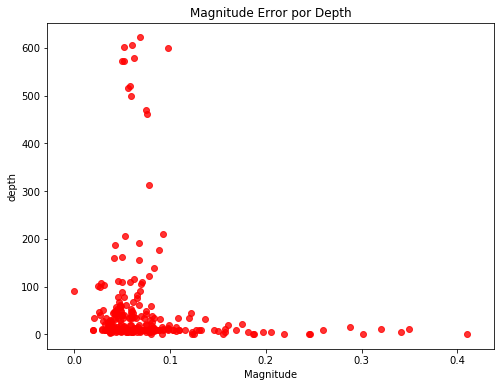

In [12]:
fig = plt.figure(figsize=(8, 6))
plt.scatter(df["Magnitude Error"], df.Depth, c='red', alpha=0.8)
plt.title("Magnitude Error por Depth")
plt.ylabel('depth')
plt.xlabel('Magnitude')

Calcule a correlação entre as variáveis `Magnitude Error`  e `Depth`

In [13]:
df["Magnitude Error"].corr(df.Depth)

-0.076918438923387206

Explique o que significa o valor da correlação calculada acima? 

## Q5 - Describe e boxplot

Faça o `describe` e o *boxplot* da `Latitude` e da `Longitude`. Explique os valores

In [14]:
df.Latitude.describe

<bound method NDFrame.describe of 0        19.2460
1         1.8630
2       -20.5790
3       -59.0760
4        11.9380
5       -13.4050
6        27.3570
7       -13.3090
8       -56.4520
9       -24.5630
10       -6.8070
11       -2.6080
12       54.6360
13      -18.6970
14       37.5230
15      -51.8400
16       51.2510
17       51.6390
18       52.5280
19       51.6260
20       51.0370
21       51.7300
22       51.7750
23       52.6110
24       51.8310
25       51.9480
26       51.4430
27       52.7730
28       51.7720
29       52.9750
          ...   
23382   -10.9640
23383    21.2897
23384    21.3697
23385    14.0882
23386    -4.5049
23387    -4.4244
23388    -5.6497
23389   -10.2137
23390   -34.9886
23391    -6.3046
23392     8.3489
23393   -10.1904
23394    -9.9640
23395   -10.1773
23396    37.1442
23397   -10.1785
23398   -10.1549
23399    -7.5082
23400    21.5036
23401    -5.2453
23402    -5.1460
23403   -43.4029
23404   -43.4810
23405    45.7192
23406    38.3754
23407    38.39

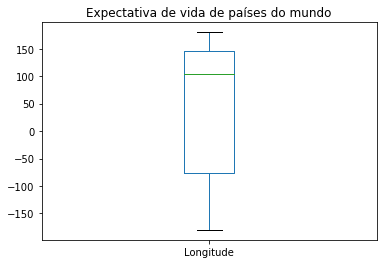

In [15]:
plot=df.Longitude.plot(kind='box',title='Expectativa de vida de países do mundo')#, color='red'

## Q6 - Tirando conclusões com base nos dados

Em um certo lugar já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`. 
 
Responda: 
    * É mais provável que tenha sido no norte ou no sul? 
    
Assuma que os Magnitude Type e Type são independentes


In [17]:
MBfilter = df[df["Magnitude Type"] == "MB"]
DFcut = MBfilter[MBfilter.Type == 'Nuclear Explosion']
DFcut.head()


,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Hemisfério
2797,07/23/1973,01:22:58,49.986,78.853,Nuclear Explosion,0.0,NaN,NaN,6.3,MB,...,NaN,NaN,NaN,NaN,USP00002TP,US,US,US,Reviewed,Norte
2859,09/12/1973,06:59:54,73.302,55.161,Nuclear Explosion,0.0,NaN,NaN,6.8,MB,...,NaN,NaN,NaN,NaN,USP00003DP,US,US,US,Reviewed,Norte
2876,09/27/1973,06:59:58,70.756,53.872,Nuclear Explosion,0.0,NaN,NaN,6.0,MB,...,NaN,NaN,NaN,NaN,USP00003K1,US,US,US,Reviewed,Norte
2897,10/27/1973,06:59:57,70.779,54.177,Nuclear Explosion,0.0,NaN,NaN,6.9,MB,...,NaN,NaN,NaN,NaN,USP00003YA,US,US,US,Reviewed,Norte
2951,12/14/1973,07:46:57,50.036,79.011,Nuclear Explosion,0.0,NaN,NaN,6.0,MB,...,NaN,NaN,NaN,NaN,USP00004HT,US,US,US,Reviewed,Norte


In [18]:
ProbFinal = (DFcut.Hemisfério.value_counts(sort=False,normalize=True)*100).round(decimals=2)
ProbFinal

Sul      17.18
Norte    82.82
Name: Hemisfério, dtype: float64